# Micro-credit Defaulter Project

## Problem Statement and Data Description

Micro Finance also known as Micro Credit is a type of banking service provided to lower income or unemployed people. Many MFIs are now switching to mobile financial services as they consider it to be more convenient and cost saving than traditional method. This project consists of a one such case study of a telecommunication network provider offering financial services on mobile recharge by collaborating with a MFI. The micro-credit is provided on phone recharge and is to be paid back by subscriber within 5 days. If a person is not able to pay it in this time period he/she is considered to be a defaulter.

The task is to build a classification model. In order improve the selection of customers for credit i.e., whether the customer will be paying back loan within 5 days or else customer is labeled as defaulter.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import pickle

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df=pd.read_csv(r"Data file.csv", parse_dates=["pdate"])
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

       pdate  
0 2016-07-20  
1 2016-08-10  
2 2016-08-19  
3 2016-06-06  
4 2016-06-22  

[5 rows x 37 columns]

In [3]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

#### Target Variable:

label	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

#### Features:

1. msisdn:	mobile number of user

2. aon:	age on cellular network in days

3. daily_decr30:	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

4. daily_decr90:	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

5. rental30:	Average main account balance over last 30 days

6. rental90:	Average main account balance over last 90 days

7. last_rech_date_ma:	Number of days till last recharge of main account

8. last_rech_date_da:	Number of days till last recharge of data account

9. last_rech_amt_ma:	Amount of last recharge of main account (in Indonesian Rupiah)

10. cnt_ma_rech30:	Number of times main account got recharged in last 30 days

11. fr_ma_rech30:	Frequency of main account recharged in last 30 days

12. sumamnt_ma_rech30:	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

13. medianamnt_ma_rech30:	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian 
Rupiah)

14. medianmarechprebal30:	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

15. cnt_ma_rech90:	Number of times main account got recharged in last 90 days

16. fr_ma_rech90:	Frequency of main account recharged in last 90 days

17. sumamnt_ma_rech90:	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

18. medianamnt_ma_rech90:	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

19. medianmarechprebal90:	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

20. cnt_da_rech30:	Number of times data account got recharged in last 30 days

21. fr_da_rech30:	Frequency of data account recharged in last 30 days

22. cnt_da_rech90:	Number of times data account got recharged in last 90 days

23. fr_da_rech90:	Frequency of data account recharged in last 90 days

24. cnt_loans30:	Number of loans taken by user in last 30 days

25. amnt_loans30:	Total amount of loans taken by user in last 30 days

26. maxamnt_loans30:	maximum amount of loan taken by the user in last 30 days

27. medianamnt_loans30:	Median of amounts of loan taken by the user in last 30 days

28. cnt_loans90:	Number of loans taken by user in last 90 days

29. amnt_loans90:	Total amount of loans taken by user in last 90 days

30. maxamnt_loans90:	maximum amount of loan taken by the user in last 90 days

31. medianamnt_loans90:	Median of amounts of loan taken by the user in last 90 days

32. payback30:	Average payback time in days over last 30 days

33. payback90:	Average payback time in days over last 90 days

34. pcircle:	telecom circle

35. pdate:	date

In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True)

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
label                   209593 non-null int64
msisdn                  209593 non-null object
aon                     209593 non-null float64
daily_decr30            209593 non-null float64
daily_decr90            209593 non-null float64
rental30                209593 non-null float64
rental90                209593 non-null float64
last_rech_date_ma       209593 non-null float64
last_rech_date_da       209593 non-null float64
last_rech_amt_ma        209593 non-null int64
cnt_ma_rech30           209593 non-null int64
fr_ma_rech30            209593 non-null float64
sumamnt_ma_rech30       209593 non-null float64
medianamnt_ma_rech30    209593 non-null float64
medianmarechprebal30    209593 non-null float64
cnt_ma_rech90           209593 non-null int64
fr_ma_rech90            209593 non-null int64
sumamnt_ma_rech90       209593 non-null int64
medianamnt_ma_rech90    209593 non-nul

we don't have any missing values in this dataset

In [6]:
df.shape

(209593, 36)

Number of rows = 209593

Number of columns = 36

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(209592, 36)

No duplicate data 

### Statistical Analysis

In [9]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209592.000000  209592.000000  209592.000000  209592.000000   
mean        0.875177    8112.380399    5381.412999    6082.529123   
std         0.330519   75696.261220    9220.644093   10918.836919   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.439500      42.691917   
50%         1.000000     527.000000    1469.091833    1500.000000   
75%         1.000000     982.000000    7244.096000    7802.795000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209592.000000  209592.000000      209592.000000      209592.000000   
mean     2692.578912    3483.407309        3755.865715        3712.220632   
std      4308.596841    5770.475034       53906.020204       53374.960145   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.417500     300.260000           1.000000           0.000000   
50%      1083.540000    1334.000000           3.000000           0.000000   
75%      3356.945000    4201.792500           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209592.000000  209592.000000  ...  209592.000000  209592.000000   
mean        2064.458973       3.978053  ...       2.758975      17.951992   
std         2370.790003       4.256099  ...       2.554507      17.379778   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max        55000.000000     203.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209592.000000       209592.000000  209592.000000  209592.000000   
mean        274.660029            0.054029      18.520988      23.645397   
std        4245.274734            0.218039     224.797957      26.469924   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209592.000000       209592.000000  209592.000000  209592.000000  
mean          6.703138            0.046078       3.398639       4.321302  
std           2.103869            0.200692       8.813330      10.307791  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 33 columns]

We can observe mean, standard deviation, minimum, maximum and quartiles. By lookin closely at these parameters we observe many oultiers in our data due to large standard deviation(even lager than mean) and too much difference between quartiles. 

### Univariate Analysis

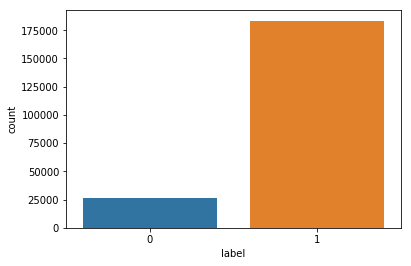

In [10]:
sns.countplot(df["label"])

We observe here that our dataset is imbalanced therefore we will have to deal with this later on in our project.

In [11]:
dff=df.drop(columns=["pdate","label","pcircle","msisdn"])

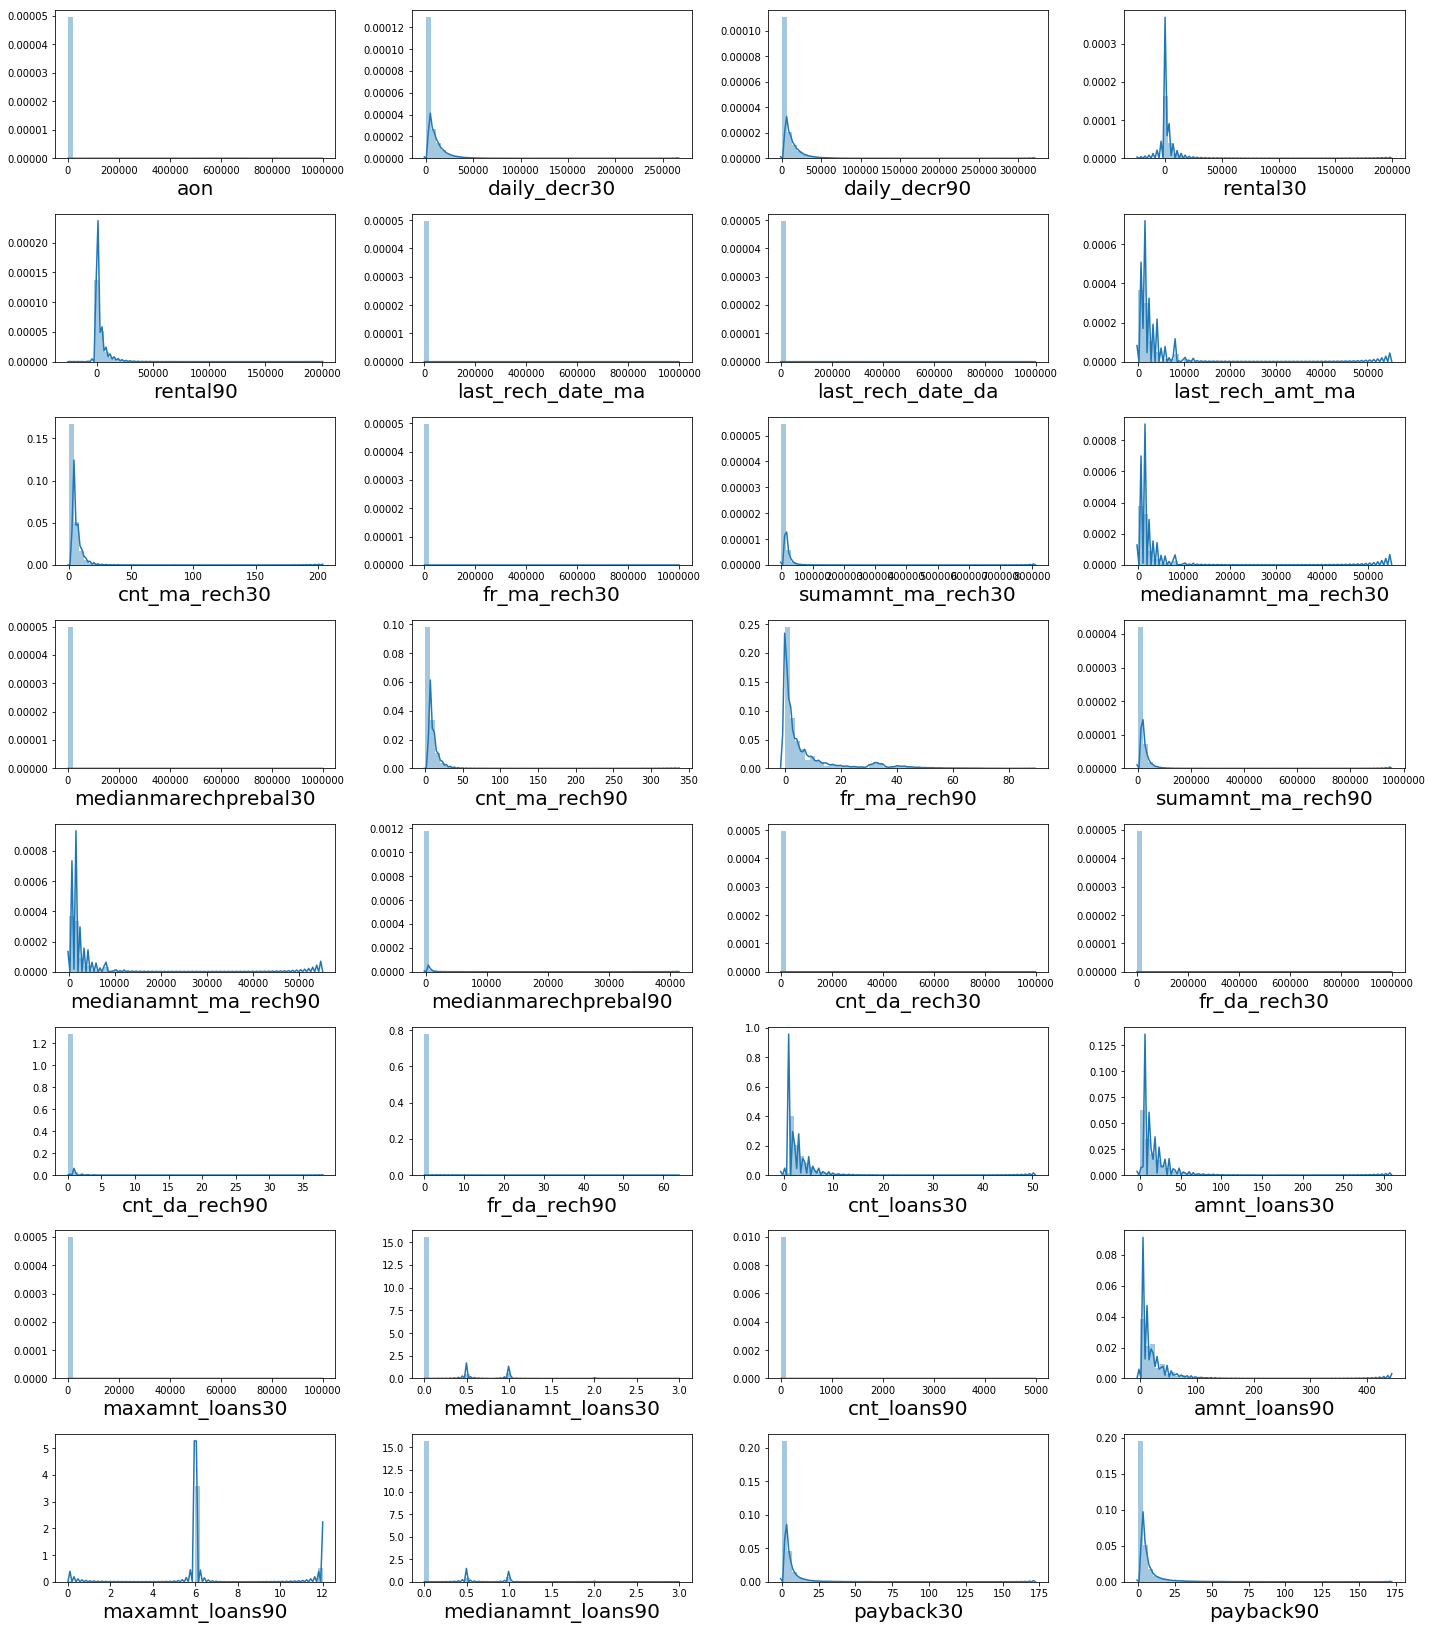

In [12]:
## checking for Normal Distribution of curve
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in dff:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.distplot(dff[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

We observe too many outliers and thus too much skewness in our data and its impossible to delete these all data therfore we will be transforming our data

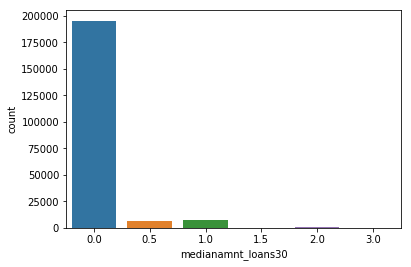

In [13]:
sns.countplot(df["medianamnt_loans30"])

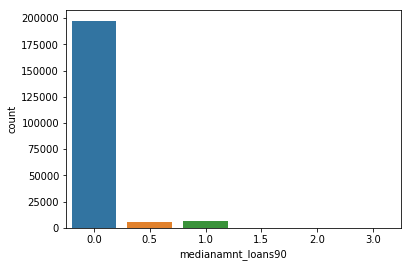

In [14]:
sns.countplot(df["medianamnt_loans90"])

Median of the loan amount taken by user is 0 in most cases for both when considered for 30 days and 90 days.

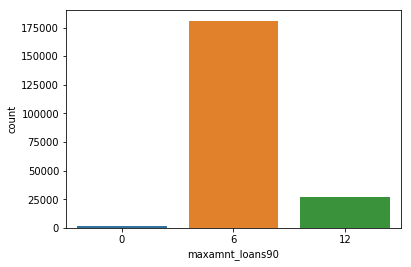

In [15]:
sns.countplot(df["maxamnt_loans90"])

Maximum of the amount loan taken by user in last 90 days has more frequency at 6

### Bivariate Analysis

In [16]:
x=dff
y=df["label"]

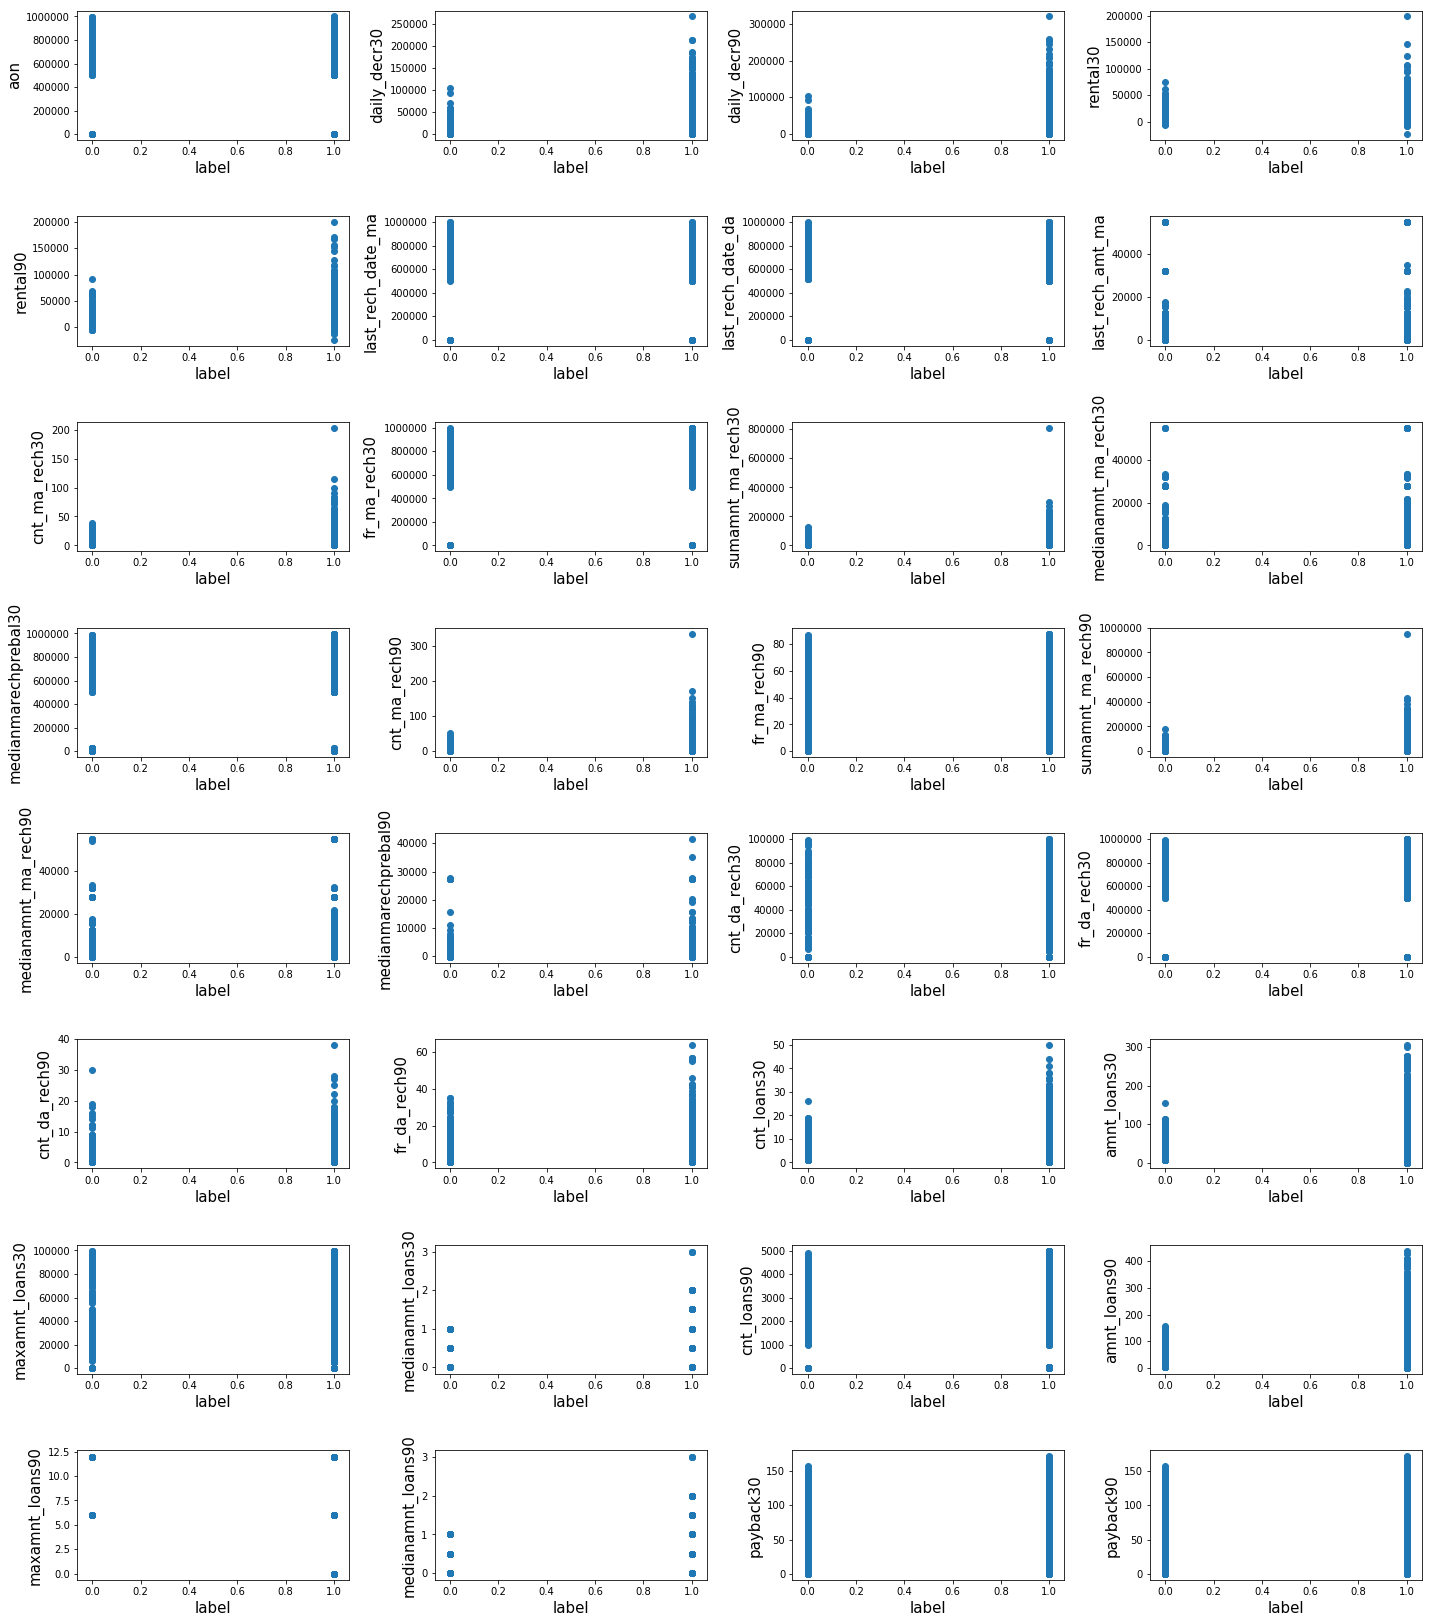

In [17]:
# checking X v/s y graph
plt.figure(figsize=(20,25), facecolor='white')
pltnumber=1
for column in x:
    if pltnumber<=36:
        ax= plt.subplot(9,4, pltnumber)
        plt.scatter(y,x[column])
        plt.ylabel(column, fontsize=15)
        plt.xlabel('label', fontsize=15)
    pltnumber+=1
plt.tight_layout()

Customer with higher main account balance is more likely to be successful in paying back loan

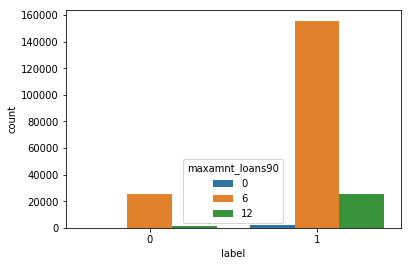

In [18]:
sns.countplot(df["label"], hue=df["maxamnt_loans90"])

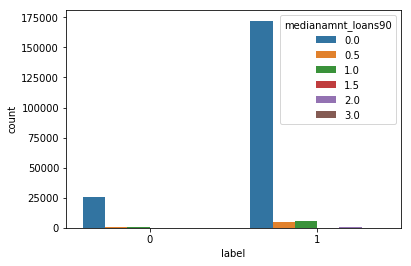

In [19]:
sns.countplot(df["label"], hue=df["medianamnt_loans90"])

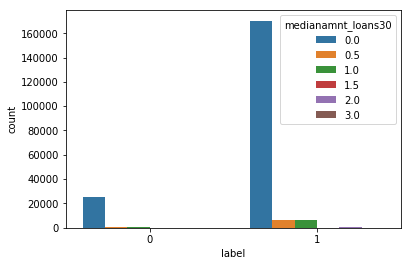

In [20]:
sns.countplot(df["label"], hue=df["medianamnt_loans30"])

In [21]:
df.pcircle.unique()

array(['UPW'], dtype=object)

### Data Pre-processing

In [22]:
## Extracting data from dates column
df_dates=pd.DataFrame()
df_dates["Month"]=df["pdate"].dt.month_name()
df_dates["day"]=df["pdate"].dt.day_name()
df_dates["year"]=df["pdate"].dt.year

In [23]:
# making a new dataframe with extracted date data
data=pd.concat([df,df_dates],axis=1)
data.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  amnt_loans90  \
0                2.0                0.0              1539  ...            12   
1               20.0                0.0              5787  ...            12   
2                3.0                0.0              1539  ...             6   
3               41.0                0.0               947  ...            12   
4                4.0                0.0              2309  ...            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

       pdate   Month        day  year  
0 2016-07-20    July  Wednesday  2016  
1 2016-08-10  August  Wednesday  2016  
2 2016-08-19  August     Friday  2016  
3 2016-06-06    June     Monday  2016  
4 2016-06-22    June  Wednesday  2016  

[5 rows x 39 columns]

In [24]:
data.year.unique()

array([2016], dtype=int64)

In [25]:
data.drop(columns=["year","pcircle","msisdn","pdate"],inplace=True)

In [26]:
lab_enc=LabelEncoder()
cols=["Month", "day"]
for i in cols:
    df1= lab_enc.fit_transform(data[i])
    data[i]=df1
data.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  Month  day  
0                6                 0.0  29.000000  29.000000      1    6  
1               12                 0.0   0.000000   0.000000      0    6  
2                6                 0.0   0.000000   0.000000      0    0  
3                6                 0.0   0.000000   0.000000      2    1  
4                6                 0.0   2.333333   2.333333      2    6  

[5 rows x 35 columns]

### Correlation

In [27]:
data.corr()

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166151   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166151  0.000374      0.977704      1.000000   
rental30              0.058084 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131805  0.004256      0.275837      0.264130   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426708   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141491  0.004306      0.295356      0.282959   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236393 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084386  0.004401     -0.078300     -0.079530   
sumamnt_ma_rech90     0.205794  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257846      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000660   
fr_da_rech30         -0.000026  0.000892     -0.001500     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366117      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044590  0.004664     -0.011611     -0.005592   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048330  0.001942      0.026922      0.019406   
payback90             0.049178  0.002205      0.047181      0.040806   
Month                -0.154948  0.001863     -0.518664     -0.539411   
day                   0.005669  0.001349     -0.010941     -0.012122   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058084  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003262  0.002794           0.001790   
last_rech_amt_ma      0.127272  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033529 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.001105 -0.000548          -0.003467   
fr_da_rech30         -0.002558 -0.002345          -0.003626   
cnt_da_rech90         0.072255  0.056282      

#### Heatmap

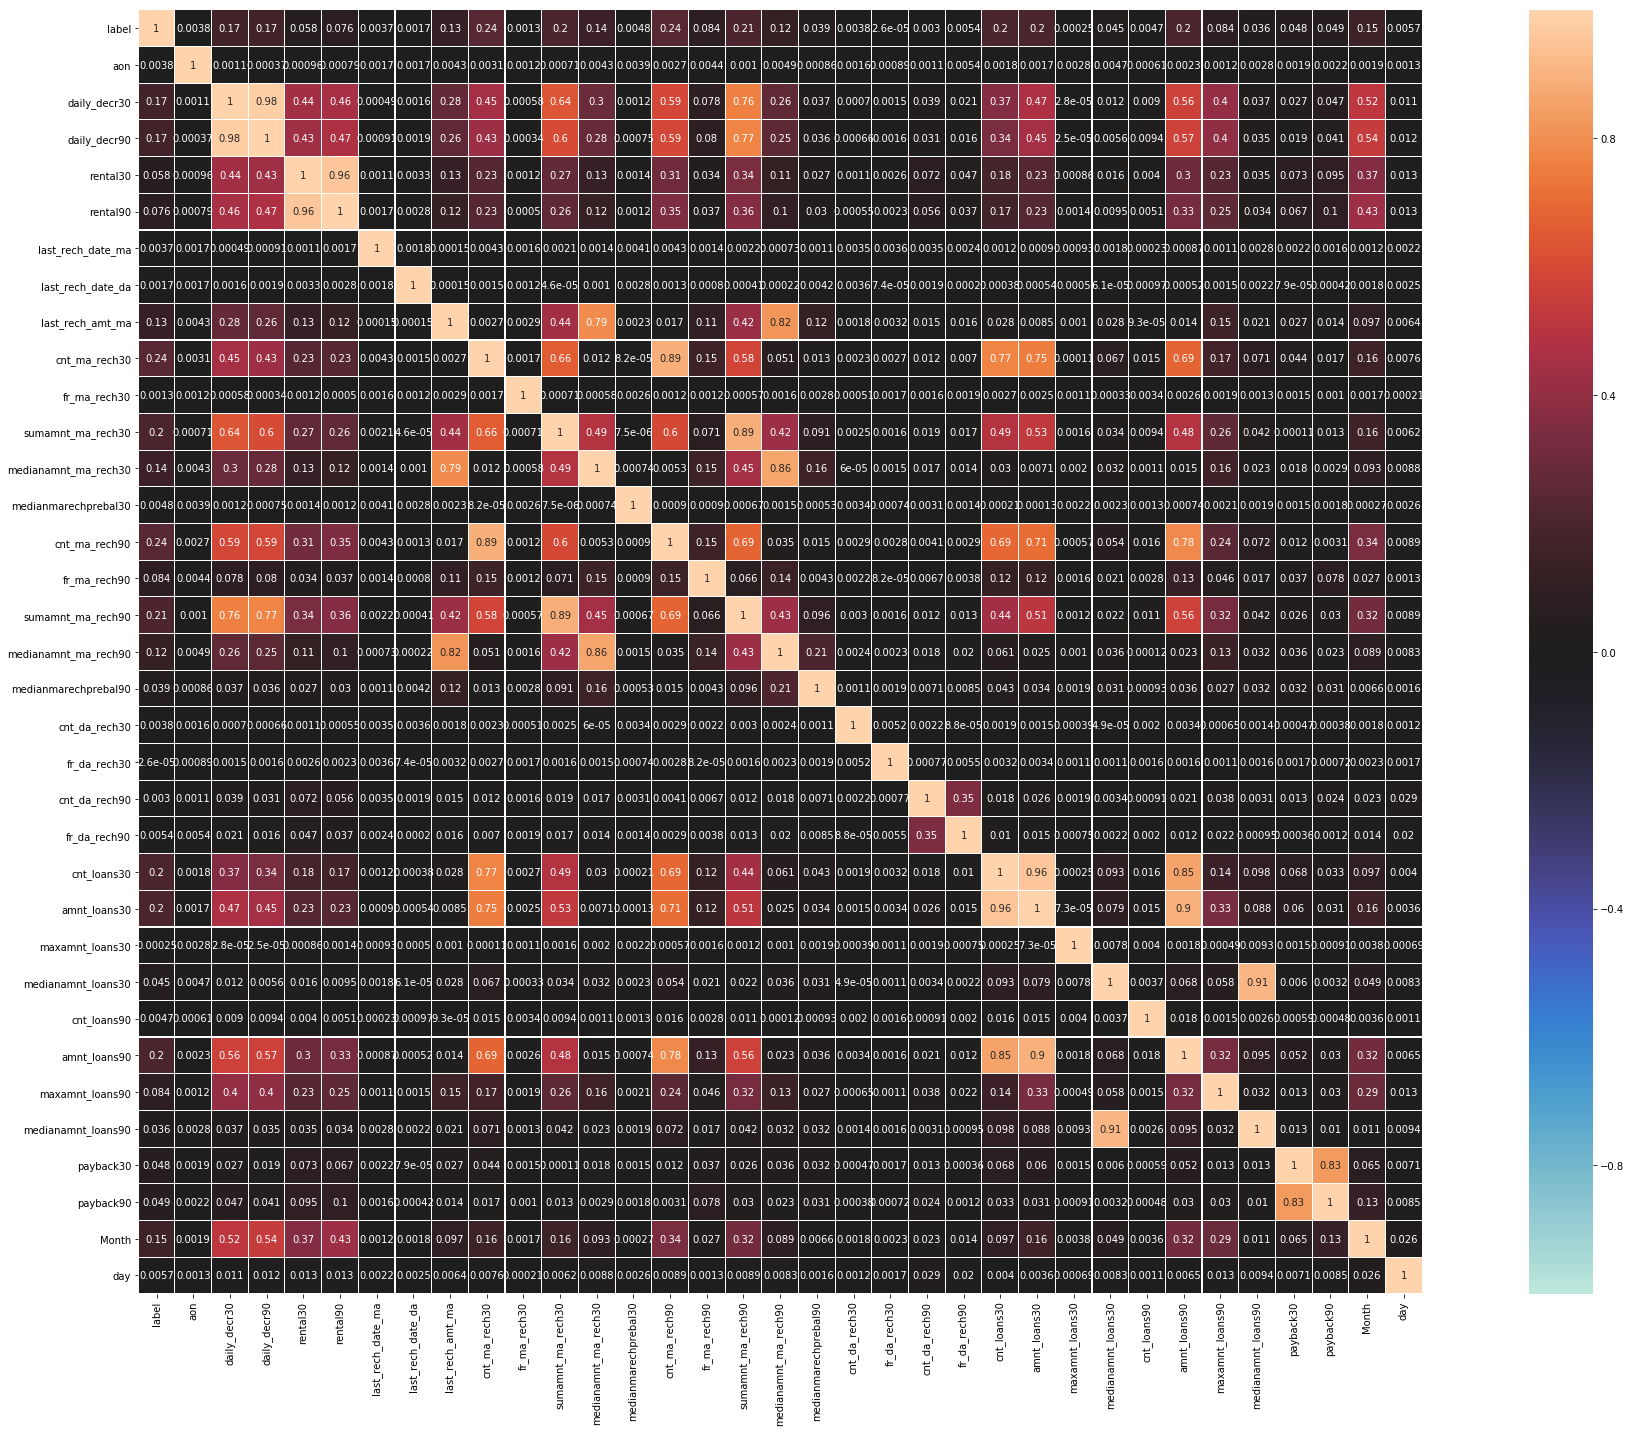

In [28]:
## HeatMap
df_corr= data.corr().abs()
plt.figure(figsize=(30,20))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidth=.1)
plt.tight_layout()

We observe multicollinearity in few features we will now look closely at them. 

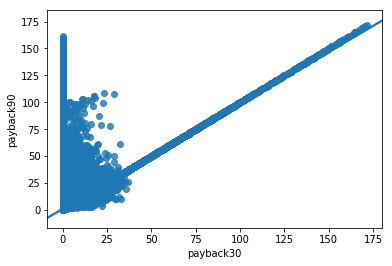

In [29]:
sns.regplot(x=data["payback30"],y=data["payback90"])

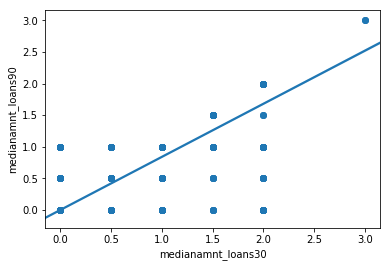

In [30]:
sns.regplot(x=data["medianamnt_loans30"],y=data["medianamnt_loans90"])

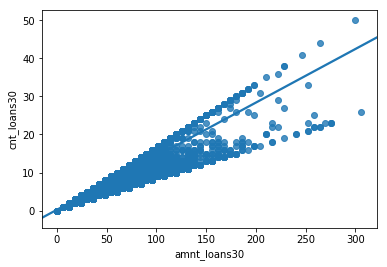

In [31]:
sns.regplot(x=data["amnt_loans30"],y=data["cnt_loans30"])

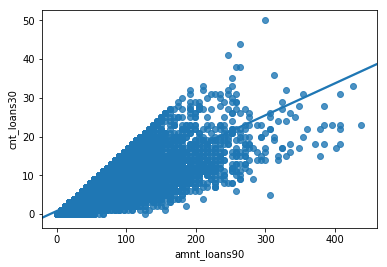

In [32]:
sns.regplot(x=data["amnt_loans90"],y=data["cnt_loans30"])

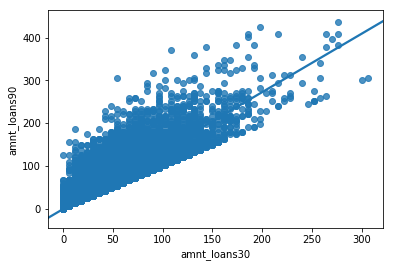

In [33]:
sns.regplot(x=data["amnt_loans30"],y=data["amnt_loans90"])

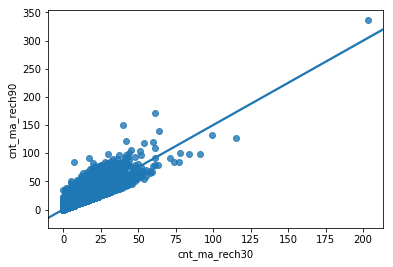

In [34]:
sns.regplot(x=data["cnt_ma_rech30"],y=data["cnt_ma_rech90"])

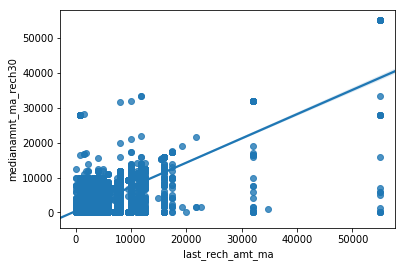

In [35]:
sns.regplot(x=data["last_rech_amt_ma"],y=data["medianamnt_ma_rech30"])

Looking at all the above plots we observe high correlation between these features

In [36]:
# Correlation with target variable
corr_mat=data.corr()
corr_mat["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236393
sumamnt_ma_rech90       0.205794
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166151
medianamnt_ma_rech30    0.141491
last_rech_amt_ma        0.131805
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084386
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058084
payback90               0.049178
payback30               0.048330
medianamnt_loans30      0.044590
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
day                     0.005669
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech

Maximum correlation : cnt_ma_rech30

Minimum correlation : fr_da_rech30

### Check for outliers

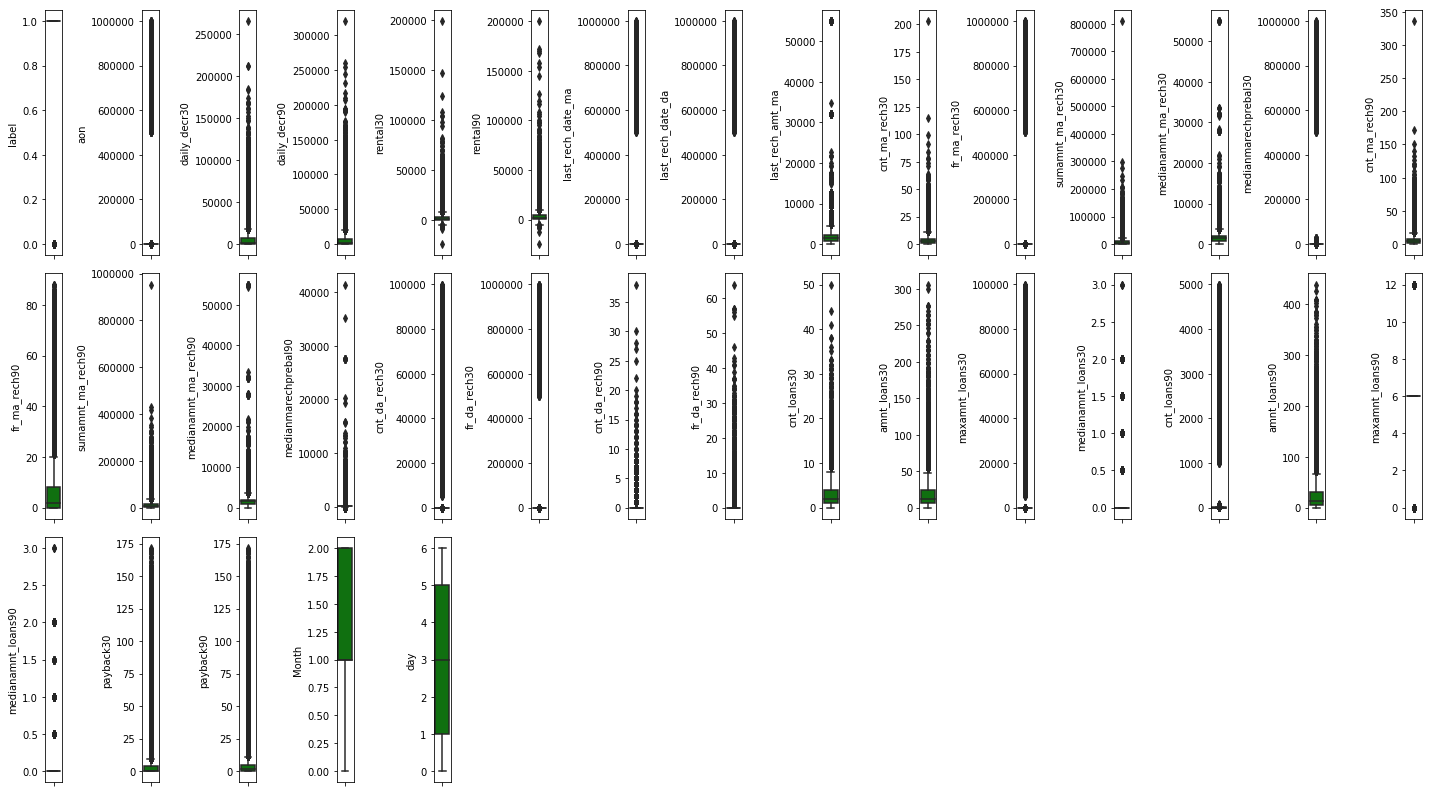

In [37]:
# plotting boxplot to check for outliers
collist=data.columns.values
plt.figure(figsize=(20,55))
for i in range(0,len(collist)):
    plt.subplot(15,15,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

We observe too many outliers in data and therefore we will now proceed to clean our data

### Data Cleaning

In [40]:
delete= pd.DataFrame()
delete["Cloumn_name"]=["rental90", "rental30", "payback90", "payback30","medianamnt_loans90","last_rech_date_da"]
delete["Outliers"]=["yes","yes","yes","yes","yes","yae"]
delete["Correlation"]=[0.075521,0.058084,0.049178,0.048330,0.035745,0.034]
delete

Cloumn_name Outliers  Correlation
0            rental90      yes     0.075521
1            rental30      yes     0.058084
2           payback90      yes     0.049178
3           payback30      yes     0.048330
4  medianamnt_loans90      yes     0.035745
5   last_rech_date_da      yae     0.034000

In [41]:
data.drop(columns=["rental90", "rental30", "payback90", "payback30","medianamnt_loans90","last_rech_date_da"],inplace=True)

In [42]:
z=np.abs(stats.zscore(data[['cnt_da_rech90','cnt_da_rech30','fr_da_rech30','fr_da_rech90','maxamnt_loans30','last_rech_date_ma',
                            'medianmarechprebal90','maxamnt_loans30','cnt_loans90','fr_ma_rech30','sumamnt_ma_rech90',
                            'medianamnt_ma_rech90']]))
index=(np.where(z>4)[0])
df_new=data.drop(data.index[index])
df_new.shape

(199027, 29)

In [43]:
print("Percentage of dataloss = ",((209592-199027)/209592)*100)

Percentage of dataloss =  5.0407458299935115


In [44]:
df_new.skew()

label                   -2.249276
aon                     10.411229
daily_decr30             2.805785
daily_decr90             2.990351
last_rech_date_ma        3.144681
last_rech_amt_ma         2.556919
cnt_ma_rech30            2.357452
fr_ma_rech30             2.011978
sumamnt_ma_rech30        2.259116
medianamnt_ma_rech30     2.439958
medianmarechprebal30    14.708677
cnt_ma_rech90            2.430584
fr_ma_rech90             2.273914
sumamnt_ma_rech90        2.026995
medianamnt_ma_rech90     2.370972
medianmarechprebal90     4.231738
cnt_da_rech30           42.619265
fr_da_rech30             0.000000
cnt_da_rech90            6.866863
fr_da_rech90             0.000000
cnt_loans30              2.516841
amnt_loans30             2.635364
maxamnt_loans30         47.856227
medianamnt_loans30       4.556863
cnt_loans90              2.741161
amnt_loans90             2.820972
maxamnt_loans90          1.727974
Month                   -0.357053
day                     -0.007733
dtype: float64

In [45]:
x=df_new.drop(columns=["label"])
y=df_new["label"]

In [46]:
features=["aon" ,"last_rech_date_ma" ,"last_rech_amt_ma" ,"cnt_ma_rech30" ,"fr_ma_rech30" ,
          "sumamnt_ma_rech30" ,"medianamnt_ma_rech30" ,"medianmarechprebal30" ,"cnt_ma_rech90" ,"fr_ma_rech90" ,
          "sumamnt_ma_rech90" ,"medianamnt_ma_rech90" ,"medianmarechprebal90" ,"cnt_da_rech30" ,"cnt_loans30" ,
          "amnt_loans30" ,"maxamnt_loans30" ,"cnt_loans90" ,"amnt_loans90"]
feat=["daily_decr30" ,"daily_decr90" ,"fr_da_rech30" ,"cnt_da_rech90" ,"fr_da_rech90" ]

In [47]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
x[features]=scaler.fit_transform(x[features].values)

In [48]:
x.skew()

aon                     1.687377
daily_decr30            2.805785
daily_decr90            2.990351
last_rech_date_ma       0.112037
last_rech_amt_ma       -0.092693
cnt_ma_rech30          -0.002119
fr_ma_rech30            0.136304
sumamnt_ma_rech30      -0.359156
medianamnt_ma_rech30   -0.224904
medianmarechprebal30   -0.127110
cnt_ma_rech90          -0.005199
fr_ma_rech90            0.142887
sumamnt_ma_rech90      -0.272229
medianamnt_ma_rech90   -0.090517
medianmarechprebal90    1.160749
cnt_da_rech30           9.649549
fr_da_rech30            0.000000
cnt_da_rech90           6.866863
fr_da_rech90            0.000000
cnt_loans30             0.035845
amnt_loans30            0.003503
maxamnt_loans30        -0.501297
medianamnt_loans30      4.556863
cnt_loans90             0.096405
amnt_loans90           -0.007983
maxamnt_loans90         1.727974
Month                  -0.357053
day                    -0.007733
dtype: float64

In [49]:
feat=["aon","daily_decr30","daily_decr90","medianmarechprebal30","medianmarechprebal90","cnt_da_rech30"]
for col in feat:
    for i in range(10):
        if x.skew().loc[col]>0.55 or x.skew().loc[col]<-0.55:
            x[col]=np.cbrt(x[col])
        else:
            break;
    print(col,"  ",x.skew().loc[col])

aon    0.3627225757755762
daily_decr30    0.4713801824486774
daily_decr90    0.5346678135776411
medianmarechprebal30    -0.12711035908914495
medianmarechprebal90    0.795494439238945
cnt_da_rech30    9.649549301297903


### Dealing with imbalanced datset

In [50]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [51]:
y_over.value_counts()

1    173880
0    173880
Name: label, dtype: int64

In [52]:
## Scaling data
scale= StandardScaler()
x_scaled=scale.fit_transform(x_over)

## Model Building

In [53]:
## determining the best random state
lr=LogisticRegression()
for i in range(0,200):
    x_train, x_test, y_train, y_test= train_test_split(x_scaled, y_over , test_size=0.30, random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    score_lr=accuracy_score(y_test,pred_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("Best random state is ",i)
        print("Training Score ",accuracy_score(y_train,pred_train)*100)
        print("Testing Score ",accuracy_score(y_test,pred_test)*100)
        break;

Best random state is  1
Training Score  77.57690032534754
Testing Score  77.60812054290315


In [54]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y_over , test_size=0.25, random_state=1)

#### Logistic Regression

In [55]:
lr=LogisticRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
score_lr=accuracy_score(y_test,y_pred)
print("Logistic Regression model Score =",accuracy_score(y_test,y_pred))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:\n",classification_report(y_test,y_pred,digits=2))

Logistic Regression model Score = 0.7754543363239016
Confusion Matrix :
 [[34629  8825]
 [10697 32789]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78     43454
           1       0.79      0.75      0.77     43486

    accuracy                           0.78     86940
   macro avg       0.78      0.78      0.78     86940
weighted avg       0.78      0.78      0.78     86940



#### RandomForest Classification

In [57]:
rnf=RandomForestClassifier()
rnf.fit(x_train, y_train)
y_pred= rnf.predict(x_test)
score_rnf=accuracy_score(y_test,y_pred)
print("Random Forest model Score =",accuracy_score(y_test,y_pred))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:\n",classification_report(y_test,y_pred,digits=2))

Random Forest model Score = 0.9436162870945479
Confusion Matrix :
 [[40908  2546]
 [ 2356 41130]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     43454
           1       0.94      0.95      0.94     43486

    accuracy                           0.94     86940
   macro avg       0.94      0.94      0.94     86940
weighted avg       0.94      0.94      0.94     86940



#### DecisionTree Classifier

In [58]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred= dt.predict(x_test)
score_dt=accuracy_score(y_test,y_pred)
print("Decision Tree model Score =",accuracy_score(y_test,y_pred))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:\n",classification_report(y_test,y_pred,digits=2))

Decision Tree model Score = 0.9044628479411088
Confusion Matrix :
 [[39663  3791]
 [ 4515 38971]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     43454
           1       0.91      0.90      0.90     43486

    accuracy                           0.90     86940
   macro avg       0.90      0.90      0.90     86940
weighted avg       0.90      0.90      0.90     86940



#### Gradient Boosting

In [59]:
gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred= gb.predict(x_test)
score_gb=accuracy_score(y_test,y_pred)
print("Gradient Boosting model Score =",accuracy_score(y_test,y_pred))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:\n",classification_report(y_test,y_pred,digits=2))

Gradient Boosting model Score = 0.8867379802162411
Confusion Matrix :
 [[39538  3916]
 [ 5931 37555]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     43454
           1       0.91      0.86      0.88     43486

    accuracy                           0.89     86940
   macro avg       0.89      0.89      0.89     86940
weighted avg       0.89      0.89      0.89     86940



#### Using Cross Validation Score to check for overfitting of model  

#### Logistic Regression

In [60]:
cross_val_score(lr, x_scaled, y_over, cv=5)
cvs_lr=cross_val_score(LogisticRegression(), x_scaled, y_over, cv=5).mean()
print("Logistic Regression Cross Validation score= ",cvs_lr)

Logistic Regression Cross Validation score=  0.7757706464228203


#### DecisionTree Classifier

In [61]:
cross_val_score(dt, x_scaled, y_over, cv=5)
cvs_dt=cross_val_score(DecisionTreeClassifier(), x_scaled, y_over, cv=5).mean()
print("DecisionTree Classifier Cross Validation score= ",cvs_dt)

DecisionTree Classifier Cross Validation score=  0.9016074304117783


#### RandomForest Classification

In [63]:
cvs_rnf=cross_val_score(RandomForestClassifier(), x_scaled, y_over, cv=3).mean()
print("Random Forest Classifier Cross Validation score= ",cvs_rnf)

Random Forest Classifier Cross Validation score=  0.936783988957902


#### Gradient Boosting

In [65]:
cvs_gb=cross_val_score(GradientBoostingClassifier(), x_scaled, y_over, cv=3).mean()
print("Gradient Boosting Cross Validation score= ",cvs_gb)

Gradient Boosting Cross Validation score=  0.8846877156659766


### ROC AUC Score and Curve

In [66]:
print("ROC_AUC_Score for decisiontreeClassifier= ",roc_auc_score(y_test,dt.predict(x_test)))

print("ROC_AUC_Score for Logistic Regression= ",roc_auc_score(y_test,lr.predict(x_test)))

print("ROC_AUC_Score for Random Forest Classifier= ",roc_auc_score(y_test,rnf.predict(x_test)))

print("ROC_AUC_Score for Gradient Boosting= ",roc_auc_score(y_test,gb.predict(x_test)))

ROC_AUC_Score for decisiontreeClassifier=  0.904465900131221
ROC_AUC_Score for Logistic Regression=  0.7754622312198742
ROC_AUC_Score for Random Forest Classifier=  0.9436154750701901
ROC_AUC_Score for Gradient Boosting=  0.8867464955945348


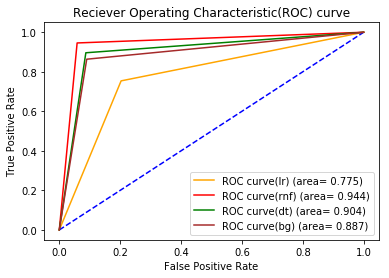

In [67]:
fpr, tpr, threshold= roc_curve(y_test,lr.predict(x_test))
plt.plot(fpr,tpr,color='orange',label='ROC curve(lr) (area= %0.3f)'%(roc_auc_score(y_test,lr.predict(x_test))))
plt.plot([0,1],[0,1], color='blue', linestyle='--')

fpr, tpr, threshold= roc_curve(y_test,rnf.predict(x_test))
plt.plot(fpr,tpr,color='red', label='ROC curve(rnf) (area= %0.3f)'%(roc_auc_score(y_test,rnf.predict(x_test))))

fpr, tpr, threshold= roc_curve(y_test,dt.predict(x_test))
plt.plot(fpr,tpr,color='green', label='ROC curve(dt) (area= %0.3f)'%(roc_auc_score(y_test,dt.predict(x_test))))

fpr, tpr, threshold= roc_curve(y_test,gb.predict(x_test))
plt.plot(fpr,tpr,color='brown', label='ROC curve(bg) (area= %0.3f)'%(roc_auc_score(y_test,gb.predict(x_test))))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic(ROC) curve')
plt.legend(loc='lower right')
plt.show() 

By looking at the accuracy, precision, recall, Cross validation score and ROC AUC score score we conclude that Random forest is the best model so we will now move forward to tune it.

#### Hyper Parametric Tuning

In [69]:
# finding best parameters
clf= RandomForestClassifier()
params={'n_estimators':[50,100], 'criterion':['entropy','ginni'],
       'max_depth':[10], 'min_samples_split':[10,11],
       'min_samples_leaf':[5,6]}
grd=GridSearchCV(clf,param_grid=params)
grd.fit(x_train,y_train)
print('best params=>',grd.best_params_)

best params=> {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 100}


In [70]:
clf= grd.best_estimator_
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [73]:
cfm =confusion_matrix(y_test,y_pred)
print("Accuracy Score :",clf.score(x_test,y_test))
print("Confusion Matrix :\n",cfm,"\n")
print("Classification Report:\n",classification_report(y_test,y_pred,digits=2))
print("\n ROC_AUC_Score for Tuned Random forest= ",roc_auc_score(y_test,clf.predict(x_test)))

Accuracy Score : 0.872210720036807
Confusion Matrix :
 [[39143  4311]
 [ 6799 36687]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88     43454
           1       0.89      0.84      0.87     43486

    accuracy                           0.87     86940
   macro avg       0.87      0.87      0.87     86940
weighted avg       0.87      0.87      0.87     86940


 ROC_AUC_Score for Tuned Random forest=  0.8722212359441608


### Saving Model

In [72]:
filename= "MicroCredit.pickle"
pickle.dump(clf,open(filename,'wb'))